In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [19]:
###Train Dataset

In [2]:
strain = pd.read_csv("C:/Users/Tejal/Desktop/AS/AS - 17-SVM/SalaryData_Train(1).csv")
strain


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
strain

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
strain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


<function matplotlib.pyplot.show(close=None, block=None)>

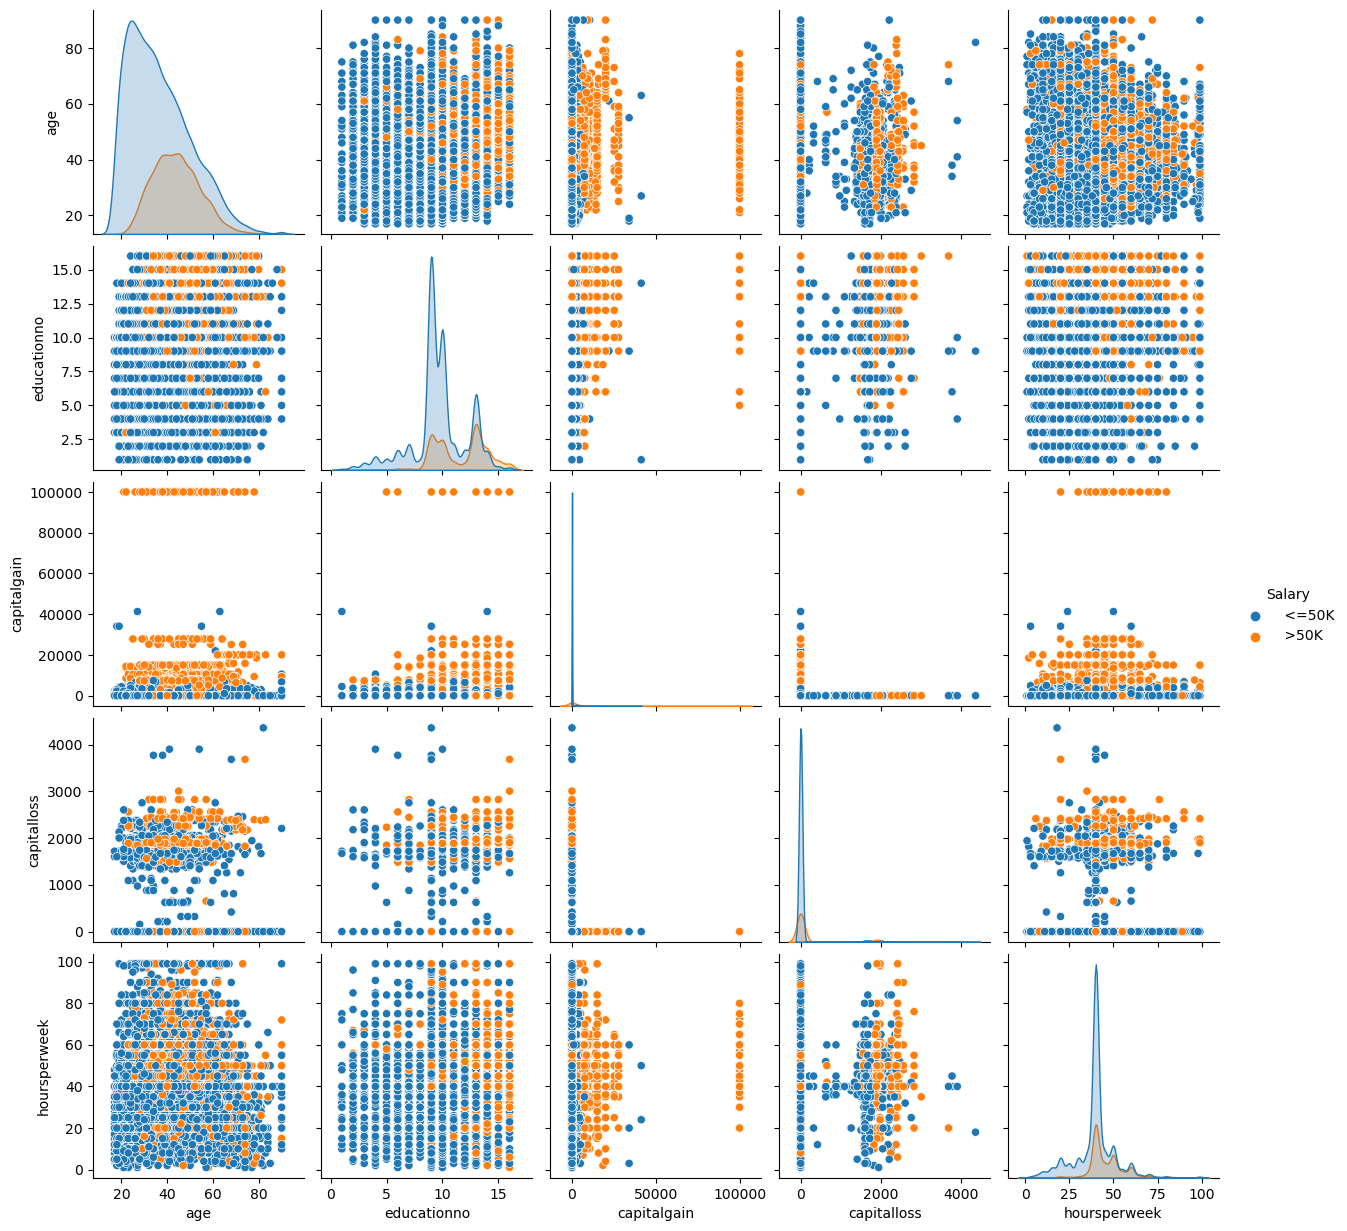

<Figure size 1800x800 with 0 Axes>

In [8]:
sns.pairplot(data = strain, hue = 'Salary')
plt.figure(figsize = (18, 8));
plt.show


C:\Users\Tejal\AppData\Local\Temp\ipykernel_17164\1841199622.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(strain.corr(), cmap='magma', annot=True, fmt=".3f")


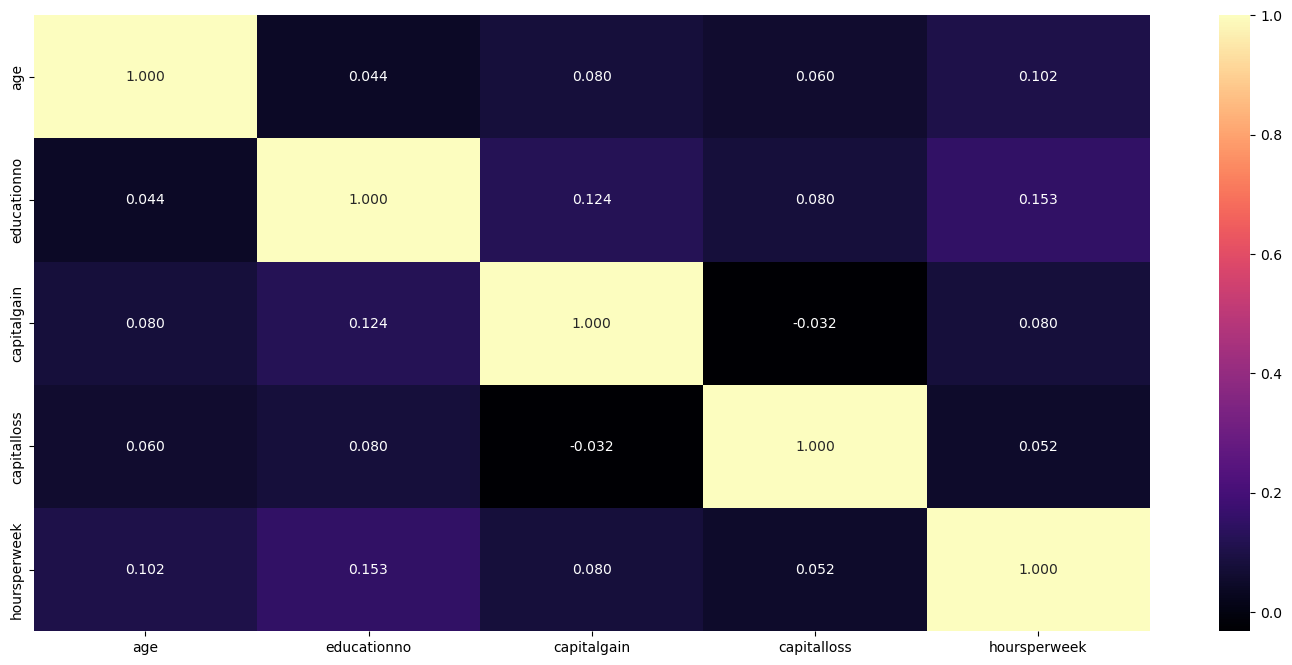

In [9]:
plt.figure(figsize = (18, 8));
sns.heatmap(strain.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()


In [ ]:
### Test Data set 

In [20]:
stest = pd.read_csv("C:/Users/Tejal/Desktop/AS/AS - 17-SVM/SalaryData_Test(1).csv")

In [21]:
stest

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [ ]:
### Deviding data into train and test split 

In [14]:
xtrain = strain.iloc[:,0:13]

In [15]:
xtrain

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [16]:
ytrain = strain.iloc[:,-1]

In [17]:
ytrain

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [22]:
xtest = stest.iloc[:,0:13]
ytest = stest.iloc[:,-1]


In [23]:
xtest

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [ ]:
### Label Encoding 

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
strain['workclass']= label_encoder.fit_transform(strain['workclass']) 
strain['education']= label_encoder.fit_transform(strain['education'])
strain['maritalstatus']= label_encoder.fit_transform(strain['maritalstatus'])
strain['occupation']= label_encoder.fit_transform(strain['occupation'])
strain['relationship']= label_encoder.fit_transform(strain['relationship'])
strain['race']= label_encoder.fit_transform(strain['race'])
strain['sex']= label_encoder.fit_transform(strain['sex'])
strain['native']= label_encoder.fit_transform(strain['native'])
strain['Salary']= label_encoder.fit_transform(strain['Salary'])


In [24]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
stest['workclass']= label_encoder.fit_transform(stest['workclass']) 
stest['education']= label_encoder.fit_transform(stest['education'])
stest['maritalstatus']= label_encoder.fit_transform(stest['maritalstatus'])
stest['occupation']= label_encoder.fit_transform(stest['occupation'])
stest['relationship']= label_encoder.fit_transform(stest['relationship'])
stest['race']= label_encoder.fit_transform(stest['race'])
stest['sex']= label_encoder.fit_transform(stest['sex'])
stest['native']= label_encoder.fit_transform(stest['native'])
stest['Salary']= label_encoder.fit_transform(stest['Salary'])


In [25]:
###Applying Train and Test split on Salary Dataset:


In [26]:
xtrain = strain.iloc[:,0:13]
ytrain = strain.iloc[:,-1]   


In [27]:
xtest = stest.iloc[:,0:13]
ytest = stest.iloc[:,-1]


In [32]:
####x_train, x_test, y_train, y_test = train_test_split(xtrain,ytrain, test_size = 0.3)


# Model Making 

##1) Kernal = rbf

In [ ]:
model_rbf = SVC(kernel = 'rbf')
model_rbf.fit(xtrain,ytrain)
ypred_rbf= model_rbf.predict(xtest)
print("Accuracy:", accuracy_score(ytest, ypred_rbf))


####2) kernal = linear



In [ ]:
model_linear = SVC(kernel = 'linear')
model_linear.fit(xtrain,ytrain)
ypred_linear= model_rbf.predict(xtest)
print("Accuracy:", accuracy_score(ytest, ypred_linear))(ytest, ypred_linear) 


In [ ]:
##confusion_matrix(y_test, ypred_linear)


3) kernal = poly

In [ ]:
model_poly = SVC(kernel = 'poly')
model_poly.fit(xtrain,ytrain)
ypred_poly= model_rbf.predict(xtest)
print("Accuracy:", accuracy_score(ytest, ypred_poly))(ytest, ypred_poly) 


In [ ]:
###confusion_matrix(y_test, ypred_poly)


Using Grid Search CV 

In [ ]:
###  for RBF

In [ ]:
class1 = SVC()
param_rbf = [{'kernel':['rbf'], 'gamma': [50,5,0.5], 'C':[15,12,7,3,0.1,0.0001]}]
gscv1 = GridSearchCV(class1,param_rbf,cv=10)
gscv1.fit(xtrain, ytrain)


In [ ]:
gscv1.best_params_, gscv1.best_score_


In [ ]:
#### for LINEAR 

In [ ]:
class2 = SVC()
param_rbf = [{'kernel':['linear'], 'gamma': [50,5,0.5], 'C':[15,12,7,3,0.1,0.0001]}]
gscv2 = GridSearchCV(class1,param_linear,cv=10)
gscv1.fit(xtrain, ytrain)


In [ ]:
gscv2.best_params_, gscv2.best_score_


In [ ]:
### for poly

In [ ]:
class3 = SVC()
param_poly = [{'kernel':['poly'], 'gamma': [45,5,0.5,0.1], 'C':[15,10,5,3,0.1,0.0001]}]
gscv3 = GridSearchCV(class3,param_poly,cv=10)
gscv3.fit(x_train, y_train)


In [ ]:
gscv3.best_params_, gscv3.best_score_
